In [13]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from sklearn.metrics import mean_squared_error


In [10]:
df = pd.read_csv("Superstore Sales Dataset.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [14]:
monthly_sales = (
    df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales']
    .sum()
    .reset_index()
)

monthly_sales.columns = ['ds', 'y']


/tmp/ipython-input-4097080337.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales']


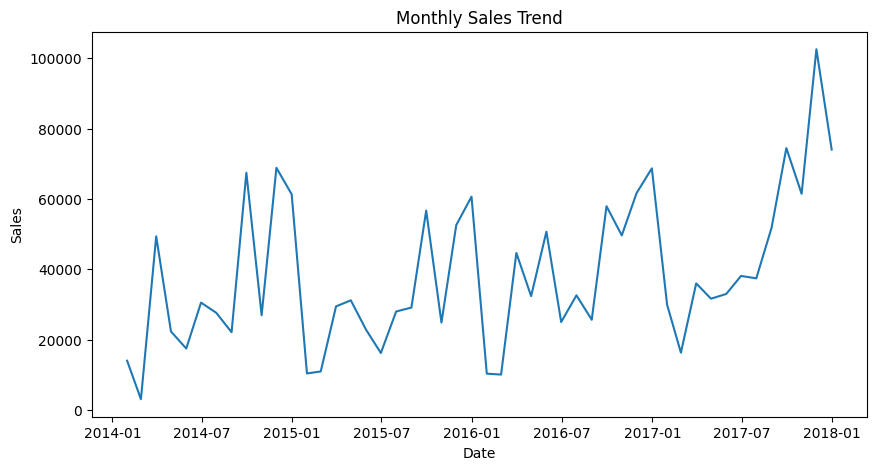

In [16]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['ds'], monthly_sales['y'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [17]:
train_size = int(len(monthly_sales) * 0.8)
train = monthly_sales[:train_size]
test = monthly_sales[train_size:]


In [18]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model.fit(train)


In [19]:
future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [20]:
predicted = forecast.iloc[-len(test):]['yhat'].values
actual = test['y'].values

rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print("RMSE:", rmse)
print("MAPE:", mape)


RMSE: 15376.374644284284
MAPE: 21.255889174090136


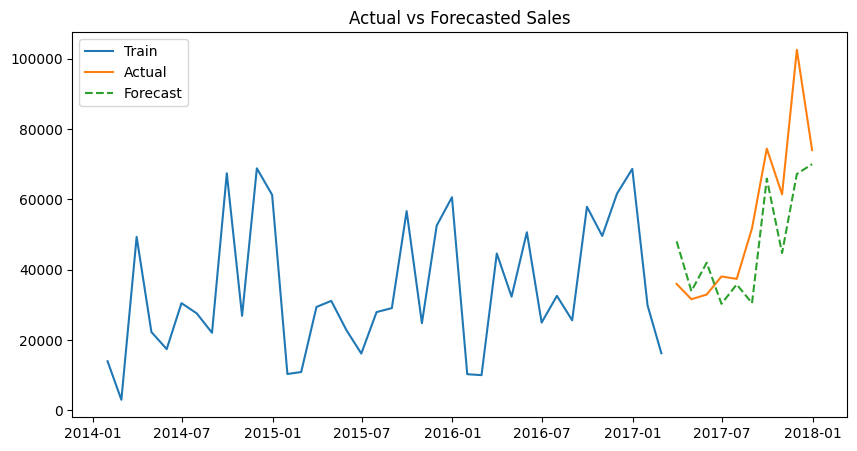

In [21]:
plt.figure(figsize=(10,5))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], predicted, label='Forecast', linestyle='--')
plt.legend()
plt.title("Actual vs Forecasted Sales")
plt.show()


In [22]:
future_3 = model.make_future_dataframe(periods=3, freq='M')
forecast_3 = model.predict(future_3)

next_quarter = forecast_3.tail(3)[['ds', 'yhat']]
print(next_quarter)


           ds          yhat
38 2017-03-31  48066.619508
39 2017-04-30  33921.365749
40 2017-05-31  42008.818911


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


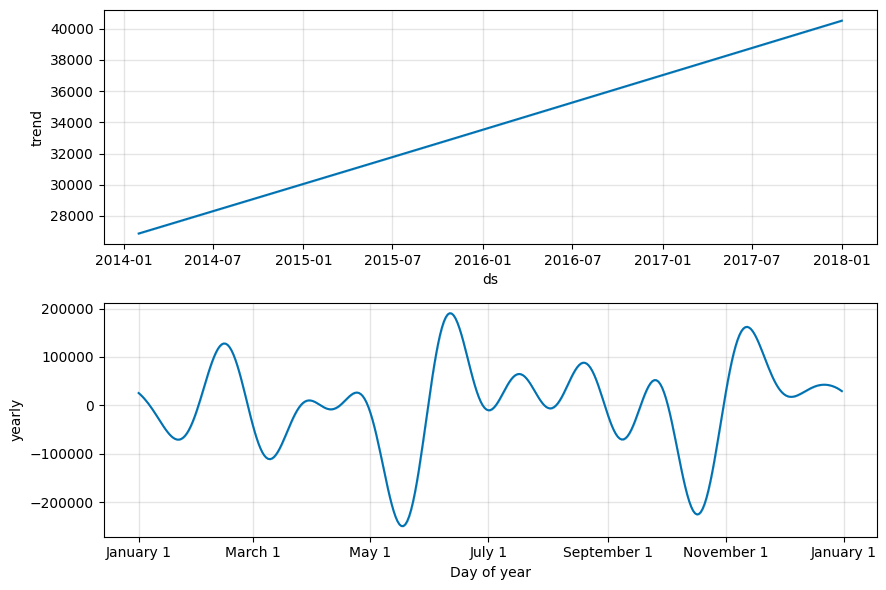

In [23]:
model.plot_components(forecast)
plt.show()
